In [ ]:
import warnings
warnings.filterwarnings('ignore')

import random
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import t, norm, chi2, chi2_contingency

import math, scipy, sympy
from bs4 import BeautifulSoup as BS
import requests, re, urllib

from urllib import robotparser
from urllib.request import urlopen

from matplotlib import rc
rc('font', family='Malgun Gothic')      #한글 폰트설정
plt.rcParams['axes.unicode_minus']=False      #마이너스 부호 출력 설정

파싱 -> 다룰 수 있는 형태로 바꿈<br>
뷰티풀숲을 쓰면 html을 돔 구조로 접근할 수 있게 바꿔줌

## 웹 개발 언어

데이터 수집을 할 때 웹 개발 언어를 알아야 하는 이유는 웹 페이지에서 데이터를 가져오기 위해서입니다.

예를 들어, 어느 날 친구가 당신에게 "너는 컴퓨터가 얼마나 똑똑한지 알아?"라고 물어봤다고 생각해보세요. 당신은 궁금해졌고, 컴퓨터가 얼마나 똑똑한지 알아보기로 했습니다. 그래서 당신은 인터넷 검색을 통해 컴퓨터의 지능에 대한 정보를 찾아보기로 했습니다.

하지만 인터넷에는 수많은 정보가 있습니다. 모든 정보를 일일이 읽어보기에는 시간이 너무 오래 걸리죠. 이때 웹 개발 언어를 이해하고 파이썬 라이브러리를 사용하면 웹 페이지에서 필요한 정보만을 자동으로 추출할 수 있습니다.

## HTML, CSS, Javascript는 웹 개발에 사용되는 세 가지 주요 언어입니다.

- HTML은 HyperText Markup Language의 약자로 웹 페이지의 구조를 만들기 위한 언어입니다. HTML은 웹 페이지의 내용과 구조를 정의하는 데 사용됩니다.

- CSS는 Cascading Style Sheets의 약자로 웹 페이지의 디자인과 레이아웃을 만들기 위한 스타일시트입니다. CSS는 HTML로 작성된 웹 페이지의 외형을 예쁘게 바꿀 수 있습니다. 글자 색상과 배경 색상, 배치 등을 자유롭게 변경할 수 있습니다.

- Javascript는 웹 페이지를 프로그래밍하기 위한 언어입니다. Javascript를 사용하면 웹 페이지에 동적인 기능을 추가할 수 있습니다.

#### HTML의 구조  및 태그
- 구조
 - $<!Doctype html>$ : HTML5 문서를 선언하는 구문
 - $<html></html>$ : HTML 문서의 시작과 끝
 - $<head></head>$ : CSS, JavaScript, meta, title 정보들을 설정
 - $<body></body>$ : 실제 홈페이지 화면을 나타내는 부분

- 요소 구조
 - HTML 요소는 여러 속성들을 가질 수 있으며 속성들은 해당 요소에 대한 추가 정보를 제공
 - 시작 태그$(< >)$로 시작해서 종료 태그$(</>)$로 끝남
 - 요소 안에 다른 요소를 작성할 수 있음 
 
- F12 누르면 html 홈페이지 구조 볼 수 있음

<img src = '../dataset/html요소구조.jpg' STYLE = 'width:500px;'>

In [ ]:
# HTML 기본 구조
html ='''
<!DOCTYPE html>                html5 명시
<html lang="en">               html 태그로 모든 태그를 감사줌. lang이라는 속성을 포함
 <head>                        head 태그는 meta, title 이외의 style, script, link와 같은 태그 포함
     <meta charset="UTF-8">    
     <title>a.html</title>      title 태그는 문서의 제목
     <meta name="viewport" content="width=device-width, initial-scale=1.0"> meta 태그는 name과 contents속성으로 문서 정보 포함
 </head>
 <body>                        웹페이지의 내용 포함
     <style type="text/css">    CSS 코드가 포함된는 태그  
     </style>
                                script 태그는 JavaScript 코드를 작성하거나 파일 로드. head 태그 or body 태그 하단 위치
 </body>
</html>
'''
print(f'HTML 구조 \n {html}')

HTML 구조 
 
<!DOCTYPE html>                html5 명시
<html lang="en">               html 태그로 모든 태그를 감사줌. lang이라는 속성을 포함
 <head>                        head 태그는 meta, title 이외의 style, script, link와 같은 태그 포함
     <meta charset="UTF-8">    
     <title>a.html</title>      title 태그는 문서의 제목
     <meta name="viewport" content="width=device-width, initial-scale=1.0"> meta 태그는 name과 contents속성으로 문서 정보 포함
 </head>
 <body>                        웹페이지의 내용 포함
     <style type="text/css">    CSS 코드가 포함된는 태그  
     </style>
                                script 태그는 JavaScript 코드를 작성하거나 파일 로드. head 태그 or body 태그 하단 위치
 </body>
</html>



#### HTML 태그
- p 태그를 이용하여 문단 작성
- h 태그를 이용하여 폰트 크기 설정
- ul(unordered list)과 ol(ordered list) 태그로 리스트 작성, 리스트 각각의 요소는 li(항목 나열) 태그로 표시  
- table 태그는 thead, tbody를 가질 수 있으며 표를 표현 : tr 행, th(가운데 정렬,굵은 글씨체),td 각 행의 컬럼
- input 태그와 button 태그 : 데이터를 넣는 폼과 페이지 조작 버튼 생성
- select # select 태그로 선택 리스트 생성
- a 태그로 다른 페이지로 이동. 상대경로(내가 있는 경로부터의 경로), 절대경로(항상 같은 url)
- img 태그로 이미지 포함 : src(이미지 붙임), alt(이미지 대체)
- span 태그로 p태그 처럼 글을 추가. span 태그는 옆으로 나열. br 태그 사용하여 p 태그처럼 사용
- div 태그는 화면 레이아웃을 잡는 역할 : 하위 태그들의 영역을 잡아줌

#### CSS 
- CSS로 웹 사이트를 꾸며주기 위해 해당 태그에 접근하는 방식을 크롤러에서도 사용.
- selector : CSS로 꾸미기 위해 특정 요소에 접근하는 것을 셀렉터라고 함.
  - html 파일을 만들었다면 각각의 태그에 다르게 css 를 설정 할 것입니다. 이 때, 어느 요소에 스타일을 적용할지 알려주는 방식이 바로 css 선택자 입니다.
- 태그를 이용하여 접근하면 태그는 전부 CSS 효과가 적용
- class를 이용하면 원하는 요소만 CSS 효과 적용할 수 있고 원하는 요소만 수집할 수 있음.
- id는 class와 다르게 id값이 고유해야 함(id는 한페이지에 하나만 존재해야 함)
- 부모 태그와 자식 태그를 나열하여 복잡한 셀렉터를 생성

CSS 선택자 이해

- https://ssungkang.tistory.com/entry/css-css-%EC%84%A0%ED%83%9D%EC%9E%90selector-%EC%9D%98-%EC%A2%85%EB%A5%98%EC%99%80-%EC%98%88%EC%8B%9C
- https://developer.mozilla.org/en-US/docs/Web/CSS/CSS_Selectors
- https://www.nextree.co.kr/p8468/

In [ ]:
css = """

- 우리가 html 파일을 만들었다면 각각의 태그에 다르게 css 를 설정 할 것입니다. 
  이 때, 어느 요소에 스타일을 적용할지 알려주는 방식이 바로 css 선택자 입니다.

- 선택자가 어떻게 쓰이는가?

div {
    color: black;
    background-color: yellow;
}
div 태그들에게 css 를 주기 위해서 div 라는 선택자를 사용하였습니다. 이렇게 되면 html 문서에 
모든 div 태그들에는 { } 안에 적용해준 css 속성값들이 적용이 됩니다. div 처럼 태그의 이름 말고도 
선택자를 주는 방식이 굉장히 다양함

선택자의 종류

[ 선택자를 하나만 쓸 경우 ]

전체 선택자
전체 선택자는 * 을 사용하여 나타냅니다.

html 의 모든 태그에 대하여 적용합니다.

* {
    margin: 0 auto;
} 

태그 선택자
태그 선택자는 태그의 이름 을 사용하여 나타냅니다.
태그명이 선택자와 같은 태그들에 대하여 적용합니다.

p {
    color: red;
} 

클래스 선택자
클래스 선택자는 .클래스이름 을 사용하여 나타냅니다.
클래스가 클래스이름과 같은 태그들에 대하여 적용합니다.

.ClassName {
    width: 100px;
} 

ID 선택자
ID 선택자는 #아이디이름 을 사용하여 나타냅니다.
ID가 ID 이름과 같은 태그에 대해서 적용합니다.

#IdName {
    position: fixed;
} 

[ 선택자를 여러 개 쓸 경우] 

선택자를 여러 개 쓰는 경우를 복합 선택자라고 합니다. 복합 선택자에도 여러 가지 종류가 있어 
이에 대해서 알아보겠습니다.

하위 선택자
하위 선택자는 선택자 사이를 공백을 사용하여 나타냅니다.

앞 요소의 자손인 뒷 요소를 선택합니다.

section ul {
    text-shadow: none;
}
자식 선택자

하위 선택자는 선택자 사이를 > 를 사용하여 나타냅니다.

앞 요소의 자식 인 뒷 요소를 선택합니다.

section > ul {
    text-shadow: none;
}

자손과 자식의 차이는 무엇일까요?
자손은 자식을 포괄하는 의미입니다.
자손은 모든 하위 요소를 의미하고 자식은 바로 아래의 자식 요소에만 적용합니다.

인접 형제 선택자
인접 형제 선택자는 선택자 사이를 + 를 사용하여 나타냅니다.

앞 요소 바로 뒤의 뒷 요소를 선택합니다.

h1 + ul {
    color: red;
} 

일반 형제 선택자
일반 형제 선택자는 선택자 사이에 ~ 를 사용하여 나타냅니다.

앞 요소 뒤에 있는 모든 뒷 요소를 선택합니다.

h1 ~ ul {
    color: red;
}

형제라는 건 무엇일까요?

같은 부모를 가지는 요소들을 형제 라고 합니다.

속성 선택자
속성 선택자는 각 태그가 가지고 있는 그 속성에 접근하는 방식입니다. 생각 외로 활용도가 높으며 
크롤링를 할 경우에도 적절한 id 와 class 이름이 없을 경우, 이용합니다.

태그[속성]
속성이름 에 해당되는 속성을 가진 태그를 선택합니다.

a[href] {
    font-size: 10px;
}
태그[속성="변수"]
속성 의 속성값이 변수 인 태그를 선택합니다.

a[href="http://www.naver.com"] {
    color: black;
}

태그[속성~="변수"]
속성 의 속성값이 변수 를 포함하는 태그를 선택합니다.

a[href~="naver"] {
    color: black;
}

태그[속성^="변수"]
속성 의 속성값이 변수 로 시작하는 태그를 선택합니다.

a[href^="http"] {
    color: black;
}

태그[속성$="변수"]
속성 의 속성값이 변수 로 끝나는 요소를 선택합니다.

a[href$="com"]{
    color: black;
}

태그[속성*="변수"]
속성 의 속성값이 변수 를 포함하는 태그를 선택합니다.

a[href*="naver"] {
    color: black;
}

태그[속성~="변수"] 와 태그[속성*="변수"] 의 차이는 무엇일까요?
~ 은 포함여부를 단어를 기준으로 판단하고 * 는 문자열 기준으로 판단합니다.

다음과 같은 상황에서 navers 는 어떻게 될까요?
~ 은 naver와 navers 는 단어가 다르기 때문에 선택을 못하고
* 은 navers 는 naver 라는 문자열을 포함하기 때문에 선택을 하게 됩니다.

태그[속성|="변수"]
속성 의 속성값이 변수 이거나 변수 로 시작하는 태그를 선택합니다.

a[href|="http"]{
    color: black;
}
"""
print(f'CSS 선택자 \n {css}')

CSS 선택자 
 

- 우리가 html 파일을 만들었다면 각각의 태그에 다르게 css 를 설정 할 것입니다. 
  이 때, 어느 요소에 스타일을 적용할지 알려주는 방식이 바로 css 선택자 입니다.

- 선택자가 어떻게 쓰이는가?

div {
    color: black;
    background-color: yellow;
}
div 태그들에게 css 를 주기 위해서 div 라는 선택자를 사용하였습니다. 이렇게 되면 html 문서에 
모든 div 태그들에는 { } 안에 적용해준 css 속성값들이 적용이 됩니다. div 처럼 태그의 이름 말고도 
선택자를 주는 방식이 굉장히 다양함

선택자의 종류

[ 선택자를 하나만 쓸 경우 ]

전체 선택자
전체 선택자는 * 을 사용하여 나타냅니다.

html 의 모든 태그에 대하여 적용합니다.

* {
    margin: 0 auto;
} 

태그 선택자
태그 선택자는 태그의 이름 을 사용하여 나타냅니다.
태그명이 선택자와 같은 태그들에 대하여 적용합니다.

p {
    color: red;
} 

클래스 선택자
클래스 선택자는 .클래스이름 을 사용하여 나타냅니다.
클래스가 클래스이름과 같은 태그들에 대하여 적용합니다.

.ClassName {
    width: 100px;
} 

ID 선택자
ID 선택자는 #아이디이름 을 사용하여 나타냅니다.
ID가 ID 이름과 같은 태그에 대해서 적용합니다.

#IdName {
    position: fixed;
} 

[ 선택자를 여러 개 쓸 경우] 

선택자를 여러 개 쓰는 경우를 복합 선택자라고 합니다. 복합 선택자에도 여러 가지 종류가 있어 
이에 대해서 알아보겠습니다.

하위 선택자
하위 선택자는 선택자 사이를 공백을 사용하여 나타냅니다.

앞 요소의 자손인 뒷 요소를 선택합니다.

section ul {
    text-shadow: none;
}
자식 선택자

하위 선택자는 선택자 사이를 > 를 사용하여 나타냅니다.

앞 요소의 자식 인 뒷 요소를 선택합니다.


#### JavaScript
- 웹 사이트의 기능을 넣어줌. script 태그를 이용하여 작성. head or body 하단에 위치
- js를 이용하여 HTML 코드를 생성. 크롤러로 분석하기 가장 어려운 부분임
- DOM(Document Object Model)이란 HTML을 시각적으로 쉽게 표현하기 위해 만든 객체로 크롤러 만들 때 중요
- 데이터를 수집하기 위해 DOM을 이용해 데이터에 접근한 후 해당 데이터 수집
- 웹 브라우저는 HTML 코드를 가져온 후 JavaScript를 실행시킨 결과를 보여줌
- 소스 보기 페이지에 수집하고자 하는 요소가 없다면 네트워크 탭을 이용, 서버에서 데이터를 받아오는 지 확인
- 그렇지 않은 경우 셀레니움을 사용하여 해결

http://www.tcpschool.com/javascript/js_intro_basic

### 데이터 수집용 라이브러리


파이썬 데이터 수집용 라이브러리는 크게 두가지로 분류할 수 있습니다.

1. 파이썬 표준 라이브러리 모듈: 파이썬에서 기본적으로 제공되는 라이브러리 모듈로, urllib, xml, html.parser, json 등이 이에 해당합니다.

2. 외부 라이브러리 모듈: 다른 개발자가 만들어 공개한 라이브러리 모듈로, requests, BeautifulSoup, Scrapy, Selenium 등이 이에 해당합니다.


이러한 라이브러리 모듈들을 활용하면 데이터 수집과 가공을 빠르고 쉽게 수행할 수 있습니다.

### 파이썬 표준 라이브러리 모듈
- urllib 모듈: URL을 다루는 라이브러리로, 웹에서 데이터를 가져오는 데 사용됩니다.
- xml 모듈: XML 문서를 다루는 라이브러리로, KML 데이터를 파싱하는 데 사용됩니다.
- json 모듈: JSON(JavaScript Object Notation) 형식의 데이터를 다루는 라이브러리로, JSON 데이터를 파싱하는 데 사용됩 니다.
- csv 모듈: CSV(Comma Separated Values) 형식의 데이터를 다루는 라이브러리로, CSV 데이터를 파싱하는 데 사용됩니 다.
- datetime 모듈: 날짜와 시간을 다루는 라이브러리로, 날짜와 시간을 파싱하고 조작하는 데 사용됩니다.
- collections 모듈: 컨테이너 데이터 타입을 다루는 라이브러리로, 리스트, 튜플, 딕셔너리 등을 다루는 데 사용됩니다. 
- https://docs.python.org/ko/3/py-modindex.html#cap-o

### 외부 라이브러리 모듈
- BeautifulSoup 모듈: HTML, XML 문서를 파싱하는 데 사용되는 라이브러리입니다.
- Scrapy 모듈: 웹 크롤링을 위해 만들어진 라이브러리로, 대규모 웹사이트에서 데이터 수집을 효과적으로 수행할 수 있습니다.
- Requests 모듈: HTTP 요청을 보내고 받는 데 사용되는 라이브러리입니다. REST API를 사용할 때 자주 사용됩니다.
- Selenium 모듈: 웹 브라우저를 제어하여 데이터를 수집하는 데 사용됩니다. 특히 동적인 웹사이트에서 데이터를 수집할 때 유용합니다.

### urllib 모듈

#### : 파이썬의 표준 모듈로써 URL을 다루기 위한 모듈 패키지
- 설치가 필요하지 않고 import urllib로 활용
- requests 모듈과 마찬가지로 URL과 관련된 여러가지 기능들을 제공

하위모듈
- request : URL을 열고 읽는 모듈(HTTP 요청)
- error : request 모듈에서 발생하는 에러들을 포함하는 모듈
- parse : URL을 파싱하는 모듈(URL 해석 및 조작)
- robots.txt 파일을 파싱하는 모듈

### urllib 하위 모듈
- urllib.request: 이 모듈은 URL 열고 데이터를 읽어오는데 사용됩니다. urlopen() 함수를 사용하여 URL에서 데이터를 가져올 수 있습니다. 이 모듈에는 HTTP, FTP, HTTPS 및 파일 URL을 처리하는 다양한 클래스와 함수가 포함되어 있습니다.

- urllib.parse: 이 모듈은 URL을 파싱하고 조작하는데 사용됩니다. urlparse() 함수를 사용하여 URL을 파싱하고, urlunparse() 함수를 사용하여 파싱된 URL을 다시 조립할 수 있습니다.

- urllib.error: 이 모듈은 urllib.request 모듈에서 발생하는 예외를 처리하는데 사용됩니다. 이 모듈에는 다양한 예외 클래스들이 정의되어 있습니다.

- urllib.robotparser: 이 모듈은 robots.txt 파일을 파싱하고 해석하는데 사용됩니다. RobotFileParser 클래스를 사용하여 robots.txt 파일을 파싱하고, can_fetch() 함수를 사용하여 주어진 로봇이 특정 URL에서 데이터를 가져올 수 있는지 여부를 확인할 수 있습니다.

#### requests 모듈 
: pip install requests 명령어로 설치, anaconda를 설치하면 기본 설치
- http는 요청과 응답으로 이루어져 있음
- 요청/응답 구조
 - 요청
      * GET : 정보를 가져오기 위해 요청
      * POST: 새로운 정보를 보내기 위해 요청
      * PUT: 수정할 정보를 보내기 위해 요청
      * DELETE: 정보를 삭제하기 위해 요청
 - 응답
      * 1XX: 요청을 받았고 작업 진행 중
      * 2XX: 사용자의 요청이 성공적으로 수행 됨
      * 3XX: 요청은 완료되었으나 리다이렉션이 필요
      * 4XX: 사용자의 요청이 잘못됨
      * 5XX: 서버에 오류가 발생함
- import requests로 모듈 호출 후 사용

In [ ]:
import requests
url = 'https://www.naver.com/'
response = requests.get(url)    #네이버 html코드 가져옴
print(response)    # 200 -> 사용자의 요청이 성공적으로 수행 됨

# html_data = response.text
# html_data

<Response [200]>


In [ ]:
import urllib
request = urllib.request.Request(url)
print(request)    #객체로 반환
print(request.full_url)
print(request.type)
print(request.host)

https://www.naver.com/
https
www.naver.com


In [ ]:
# urlopen: 해당 url 열기/ 응답 데이터: 바이트 형식의 HTTPResponse 객체
request1 = urllib.request.urlopen(request)
request2 = urllib.request.urlopen(url)
print(request1)
print(request2)

In [ ]:
print(request2.getheaders(), '\n')   #헤더읽기
print(request2.geturl(), '\n')   #url가져오기
print(request2.read(50), '\n')   #내용 읽기(30개만)
# print(request2.read(), '\n')   #개수 지정안해주면 다 읽어옴
print(request2.read(50).decode('utf-8'), '\n')   #바이트->utf-8 디코딩

[('Server', 'NWS'), ('Date', 'Tue, 02 May 2023 00:23:49 GMT'), ('Content-Type', 'text/html; charset=UTF-8'), ('Transfer-Encoding', 'chunked'), ('Connection', 'close'), ('Set-Cookie', 'PM_CK_loc=9643ff7596a688874527662c82394c2e87c49b96b2898c30010b82944d11d171; Expires=Wed, 03 May 2023 00:23:49 GMT; Path=/; HttpOnly'), ('Cache-Control', 'no-cache, no-store, must-revalidate'), ('Pragma', 'no-cache'), ('P3P', 'CP="CAO DSP CURa ADMa TAIa PSAa OUR LAW STP PHY ONL UNI PUR FIN COM NAV INT DEM STA PRE"'), ('X-Frame-Options', 'DENY'), ('X-XSS-Protection', '1; mode=block'), ('Strict-Transport-Security', 'max-age=63072000; includeSubdomains'), ('Referrer-Policy', 'unsafe-url')] 

https://www.naver.com/ 

b'\n<!doctype html>                          <html la' 

ng="ko" data-dark="false"> <head> <meta charset="u 



In [ ]:
# 바이트 형식의 데이터를 원하는 형식으로 변환
url='https://www.naver.com'
response = urllib.request.urlopen(url)

byte_data = response.read(300)
print(byte_data)

text_data = byte_data.decode('utf-8')
print(text_data)

b'\n<!doctype html>                          <html lang="ko" data-dark="false"> <head> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robo'

<!doctype html>                          <html lang="ko" data-dark="false"> <head> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robo


In [ ]:
# urllib.request.urlretrieve: 웹 상의 이미지를 저장
img_src = 'https://1.gall-img.com/tdgall/files/attach/images/82/210/764/061/77dd44b7170ee3c9f2266a0efe780ed1.png'
new_name = 'img.png'
urllib.request.urlretrieve(img_src, new_name)

('img.png', <http.client.HTTPMessage at 0x20a3a9fdfa0>)

In [ ]:
# 단순한 패턴을 읽을 땐, 정규표현식보다 간단한 parse모듈 사용
# url을 각 구문별로 분리해줌
url = 'https://section.blog.naver.com/Search/Post.naver?pageNo=1&rangeType=ALL&orderBy=sim&keyword=ai'
parse = urllib.parse.urlparse(url)
print(parse,'\n')

li=['scheme','netloc','path','params','query','fragment']
for i,k in zip(parse,li):
    print(f"{k}: {i}")

ParseResult(scheme='https', netloc='section.blog.naver.com', path='/Search/Post.naver', params='', query='pageNo=1&rangeType=ALL&orderBy=sim&keyword=ai', fragment='') 

scheme: https
netloc: section.blog.naver.com
path: /Search/Post.naver
params: 
query: pageNo=1&rangeType=ALL&orderBy=sim&keyword=ai
fragment: 


- scheme: URL의 프로토콜 (예: https)
- netloc: 네트워크 위치 (호스트 및 포트 번호, 예: section.blog.naver.com)
- path: URL의 경로 (예: /Search/Post.naver)
- params: 경로 매개 변수 (있는 경우, 예: None)
- query: URL의 질의 문자열 (예: pageNo=1&rangeType=ALL&orderBy=sim&keyword=ai)
- fragment: URL의 프래그먼트 식별자 (있는 경우, 예: None)

- URL(Uniform Resource Locator)은 인터넷에서 특정 자원의 위치를 가리키는 일종의 주소입니다. URL은 다양한 구성 요소로 구성되어 있습니다.
- 예를 들어, "https://www.example.com/search?q=hello"라는 URL에서 "https://"는 프로토콜, "www.example.com"은 호스트 이름, "/search"는 경로, "?q=hello"는 쿼리 문자열입니다.
<br><br>
- 쿼리 문자열은 URL에서 "?" 뒤에 오며, 일련의 이름-값 쌍으로 구성됩니다. 각각의 이름-값 쌍은 "&"로 구분됩니다. 쿼리 문자열은 일반적으로 웹 페이지나 앱에서 검색어나 필터링 옵션 등을 전달하기 위해 사용됩니다.
- 예를 들어, 위의 예시에서 "q=hello"는 "q"라는 이름을 가진 변수에 "hello"라는 값이 할당된 것입니다. 따라서 이 URL은 "hello"라는 검색어를 가지고 "/search" 경로에 해당하는 페이지를 요청하는 것입니다.

In [ ]:
# urllib.parse.urlsplit(): url을 5개로 분리하여 반환
url = 'https://blog.naver.com/koreatech91;a=1?b=2#b'
parse1 = urllib.parse.urlparse(url)
parse2 = urllib.parse.urlsplit(url)
print(parse1, '\n')
print(parse2)

ParseResult(scheme='https', netloc='blog.naver.com', path='/koreatech91', params='a=1', query='b=2', fragment='b') 

SplitResult(scheme='https', netloc='blog.naver.com', path='/koreatech91;a=1', query='b=2', fragment='b')


In [ ]:
# urllib.parse.urlunsplit(): 분리된 url다시 합침(튜플로 반환)
url = 'https://blog.naver.com/koreatech91;a=1?b=2#b'
parse1 = urllib.parse.urlparse(url)
print(parse1[1])    #blog.naver.com

parse1 = list(parse1)   #튜플이어서 리스트로 변환해서 사용
parse1[1] = 'blog.daum.net'    #네이버->다음 주소로 수정

unparse1 = urllib.parse.urlunparse(parse1)
print(unparse1)

blog.naver.com
https://blog.daum.net/koreatech91;a=1?b=2#b


In [ ]:
# urljoin(a,b): a와 b의 url을 합쳐주는 기능
# '/'에 따라 url주소가 달라짐
url='https://www.naver.com/a/b'
print(urllib.parse.urljoin(url,'c'))
print(urllib.parse.urljoin(url, '/c'))

https://www.naver.com/a/c
https://www.naver.com/c


In [ ]:
from bs4 import BeautifulSoup as BS
import requests, re

URL = 'https://search.naver.com/search.naver?query="파이썬"'
req = requests.get(url)
print(req.text)

soup = BS(req.text, 'html.parser')
soup = str(soup)

item = re.findall('[가-힣]+',soup)
m = ' '.join(item)
m

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html xmlns="http://www.w3.org/1999/xhtml">
<head>
<meta http-equiv="Content-Type" content="text/html; charset=utf-8" />
<title>네이버 :: 페이지를 찾을 수 없습니다.</title>
<link rel="stylesheet" type="text/css" href="/dist/css/err_170424.css?1017" />
<script type=text/javascript>
var defaultCharset = document.charset ;
function isIE(){ return /msie/i.test(navigator.userAgent) && !/opera/i.test(navigator.userAgent); }
function setDefaultCharset() { document.charset = defaultCharset ; }
function emulAcceptCharset(form) { if (isIE) { var defCharset = document.charset ; document.charset = form.acceptCharset ; window.onbeforeunload = setDefaultCharset ; } return true; }
</script>
</head>
<body>
<style>
a { cursor: pointer; }
</style>
<div id="wrap">
<div id="header">
<h1><a href="http://www.naver.com/"><img src="https://s.pstatic.net/static/w8/err/lg_naver.gif" alt="NAVER" width="145

'네이버 페이지를 찾을 수 없습니다 네이버홈 네이버 고객센터 죄송합니다 요청하신 페이지를 찾을 수 없습니다 방문하시려는 페이지의 주소가 잘못 입력되었거나 페이지의 주소가 변경 혹은 삭제되어 요청하신 페이지를 찾을 수 없습니다 입력하신 주소가 정확한지 다시 한번 확인해 주시기 바랍니다 관련 문의사항은 네이버 고객센터 에 알려주시면 친절하게 안내해 드리겠습니다 감사합니다 검색 검색 검색 네이버 검색으로 원하시는 페이지를 찾으실 수 있습니다'

In [ ]:
# quote(), unquote(): 퍼센트 인코딩으로 변환
# 퍼센트 인코딩(percent-encoding): url에 문자를 표현하는 문자 인코딩 방법
print(urllib.parse.quote('파이썬'))
print(urllib.parse.unquote('%ED%8C%8C%EC%9D%B4%EC%8D%AC'))

# url에 한글이 섞이면 오류 발생 -> 그래서 퍼센트 인코딩 함

%ED%8C%8C%EC%9D%B4%EC%8D%AC
파이썬


In [ ]:
url = 'https://search.naver.com/search.naver?query=%ED%8C%8C%EC%9D%B4%EC%8D%AC'
# url = 'https://search.naver.com/search.naver?query="파이썬"'  #오류 발생

response = urllib.request.urlopen(url)
byte = response.read()
text = byte.decode('utf-8')
print(text)

<!doctype html> <html lang="ko"><head> <meta charset="utf-8"> <meta name="referrer" content="always">  <meta name="format-detection" content="telephone=no,address=no,email=no"> <meta name="viewport" content="width=device-width,initial-scale=1.0,maximum-scale=2.0"> <meta property="og:title" content="파이썬 : 네이버 통합검색"/> <meta property="og:image" content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png"> <meta property="og:description" content="'파이썬'의 네이버 통합검색 결과입니다."> <meta name="description" lang="ko" content="'파이썬'의 네이버 통합검색 결과입니다."> <title>파이썬 : 네이버 통합검색</title> <link rel="shortcut icon" href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118_pc.ico">  <link rel="search" type="application/opensearchdescription+xml" href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" title="Naver" /><link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/sstatic/search/pc/css/search1_230427.css"> <link rel="stylesheet" type="text/css" href="http

In [ ]:
# 홈페이지를 로컬에 파일로 저장
request = urllib.request.Request('http://www.naver.com')
data = urllib.request.urlopen(request).read()

f = open('pc.html', 'wb')   #바이너리 형식으로 저장함
f.write(data)
f.close()


<!doctype html>                          <html lang="ko" data-dark="false"> <head> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url" content="https://www.naver.com/"> <meta name="twitter:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta name="twitter:description" content="네이버 메
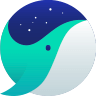
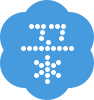

In [ ]:
with open('pc.html','rb') as f:   #저장한 파일 읽어오기
    data = f.read().decode('utf-8')
    print(data)

In [ ]:
# json 형식 데이터 가져오기
response = requests.get('https://raw.githubusercontent.com/naver/naver-openapi-guide/draft/naver-openapi-swagger.json')
result = response.json()
print(type(result),'\n')   #제이슨 데이터 -> 딕셔너리 타입
result

<class 'dict'> 



{'swagger': '2.0',
 'info': {'description': 'Naver Open API - Restful spec. You can find out more about Naver Open API at [https://developers.naver.com](https://developers.naver.com)',
  'version': '1.2.0',
  'title': 'Naver Open API',
  'termsOfService': 'https://developers.naver.com/products/terms'},
 'host': 'openapi.naver.com',
 'basePath': '/',
 'tags': [{'name': 'Clova',
   'description': 'Naver A.I platform and APIs',
   'externalDocs': {'description': 'Find out more',
    'url': 'https://developers.naver.com/products/clova/cic'}},
  {'name': 'Papago', 'description': 'Naver Machine Learning Translation APIs'},
  {'name': 'Naver Login', 'description': 'Login with Naver Id'},
  {'name': 'Naver Services',
   'description': 'Naver data trend, search, shorten url, captcha APIs'},
  {'name': 'Maps', 'description': 'Naver Mpas JS, geocode, static map APIs'}],
 'schemes': ['https'],
 'paths': {'/v1/vision/face': {'post': {'tags': ['Clova'],
    'summary': 'Clova Face Recognition (얼굴감지)'

In [ ]:
url = 'http://naver.com'
response = requests.get(url)
html_data = response.text

# print(html_data)
print(html_data.find('바로가기'))   #인덱스 찾기
print(html_data[5883:5887])

5883
바로가기


In [ ]:
# 'http://naver.com'에서 
# '네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요'를 출력
url = 'http://naver.com'
text = '네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요'
response = requests.get(url)
html_data = response.text

idx = html_data.find(text)
print(html_data[idx:idx+len(text)])

네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요


### 인덱싱

In [ ]:
text = 'k-digital training 1기'
print(text[0])
print(text[-1])
print(text.replace('1','7'))
print(text.title().replace('1','7'))

k
기
k-digital training 7기
K-Digital Training 7기


### 웹 구조 연습: HTML, CSS, JS

In [ ]:
with open('sample1.html','w',encoding='utf8') as f:
    f.write(
'''
<!DOCTYPE html>
<html>
  <head>
    <meta charset="UTF-8">
    <title>웹 연습</title>
  </head>
  <body>
  
    <header>
    <h1>HMKD Restaurant</h1>
      <nav>
        <ul>
          <li><a href="#">Menu 1</a></li>
          <li><a href="#">Menu 2</a></li>
          <li><a href="#">Menu 3</a></li>
        </ul>
      </nav>
    </header>
    <main>
      <section>
        <h3>Section1</h3>
        <p>내용이 들어갑니다.</p>
      </section>
      <section>
        <h3>Section2</h3>
        <p>다른 내용이 들어갑니다.</p>
      </section>
    </main>
    <footer>
      <p>저작권 © 2023 예시 회사. 모든 권리 보유.</p>
    </footer>
  </body>
</html>
''')

In [ ]:
with open('sample1.html', 'r', encoding='utf8') as f:
    data = f.read()
    print(data)


<!DOCTYPE html>
<html>
  <head>
    <meta charset="UTF-8">
    <title>웹 연습</title>
  </head>
  <body>
  
    <header>
    <h1>HMKD Restaurant</h1>
      <nav>
        <ul>
          <li><a href="#">Menu 1</a></li>
          <li><a href="#">Menu 2</a></li>
          <li><a href="#">Menu 3</a></li>
        </ul>
      </nav>
    </header>
    <main>
      <section>
        <h3>Section1</h3>
        <p>내용이 들어갑니다.</p>
      </section>
      <section>
        <h3>Section2</h3>
        <p>다른 내용이 들어갑니다.</p>
      </section>
    </main>
    <footer>
      <p>저작권 © 2023 예시 회사. 모든 권리 보유.</p>
    </footer>
  </body>
</html>



In [ ]:
# CSS스타일 추가
with open('sample2.html','w',encoding='utf8') as f:
    f.write('''
<!DOCTYPE html>
<html>
  <head>
    <meta charset="UTF-8">
    <title>문서 제목</title>
    <style>
      h1 {
        color: red;
      }
      nav ul li a {
        color: blue;
      }
      section h1, section p {
        text-align: left;
      }
    </style>
  </head>
  <body>
  
    <header>
      <h1>HMKD Restaurant</h1>
      <nav>
        <ul>
          <li><a href="#">메뉴 1</a></li>
          <li><a href="#">메뉴 2</a></li>
          <li><a href="#">메뉴 3</a></li>
        </ul>
      </nav>
    </header>
    <main>
      <section>
        <h1>섹션 제목</h1>
        <p>내용이 들어갑니다.</p>
      </section>
      <section>
        <h1>또 다른 섹션 제목</h1>
        <p>다른 내용이 들어갑니다.</p>
      </section>
    </main>
    <footer>
      <p>저작권 © 2023 예시 회사. 모든 권리 보유.</p>
    </footer>
  </body>
</html>
''')

In [ ]:
# JS로 동적 가능 추가
with open('sample3.html','w',encoding='utf8') as f:
    f.write('''
<!DOCTYPE html>
<html>
  <head>
    <meta charset="UTF-8">
    <title>문서 제목</title>
    <style>
      h1 {
        color: red;
      }
      nav ul li a {
        color: blue;
      }
      section h1, section p {
        text-align: left;
      }
    </style>
    <script>
      window.onload = function() {
        var menu1 = document.querySelector("#menu1");
        var menu2 = document.querySelector("#menu2");
        var menu3 = document.querySelector("#menu3");
        
        menu1.addEventListener("click", function() {
          var content = document.querySelector("#content1");
          content.style.display = "block";
        });
        
        menu2.addEventListener("click", function() {
          var content = document.querySelector("#content2");
          content.style.display = "block";
        });
        
        menu3.addEventListener("click", function() {
          var content = document.querySelector("#content3");
          content.style.display = "block";
        });
      };
    </script>
  </head>
  <body>
  
    <header>
      <h1>HMKD Restaurant</h1>
      <nav>
        <ul>
          <li><a href="#" id="menu1">메뉴 1</a></li>
          <li><a href="#" id="menu2">메뉴 2</a></li>
          <li><a href="#" id="menu3">메뉴 3</a></li>
        </ul>
      </nav>
    </header>
    <main>
      <section id="content1" style="display:none;">
        <h1>메뉴 1 내용</h1>
        <p>메뉴 1 내용이 들어갑니다.</p>
      </section>
      <section id="content2" style="display:none;">
        <h1>메뉴 2 내용</h1>
        <p>메뉴 2 내용이 들어갑니다.</p>
      </section>
      <section id="content3" style="display:none;">
        <h1>메뉴 3 내용</h1>
        <p>메뉴 3 내용이 들어갑니다.</p>
      </section>
    </main>
    <footer>
      <p>저작권 © 2023 예시 회사. 모든 권리 보유.</p>
    </footer>
  </body>
</html>
''')

#### sample2에 input, table, img, span, div 태그를 추가하여 작성하세요.

- input 태그는 텍스트 입력을 받는 폼 요소
- table 태그는 표를 만드는 요소
- img 태그는 이미지를 표시하는 요소
- span 태그는 인라인 요소로서 다른 요소를 감싸는 역할
- div 태그는 블록 요소로서 다른 요소를 감싸는 역할

In [ ]:
with open('sample4.html','w',encoding='utf8') as f:
    f.write('''
<!DOCTYPE html>
<html>
  <head>
    <meta charset="UTF-8">
    <title>문서 제목</title>
    <style>
      h1 {
        color: red;
      }
      nav ul li a {
        color: blue;
      }
      section h1, section p {
        text-align: left;
      }
    </style>
  </head>
  <body>
  
    <header>
      <h1>HMKD Restaurant</h1>
      <nav>
        <ul>
          <li><a href="#">메뉴 1</a></li>
          <li><a href="#">메뉴 2</a></li>
          <li><a href="#">메뉴 3</a></li>
        </ul>
      </nav>
    </header>
    <main>
      <section>
        <h1>섹션 제목</h1>
        <p>내용이 들어갑니다.</p>
        <input type="text" name="username" placeholder="이름을 입력하세요.">
        <table>
          <tr>
            <th>이름</th>
            <th>나이</th>
          </tr>
          <tr>
            <td>홍길동</td>
            <td>30</td>
          </tr>
          <tr>
            <td>김철수</td>
            <td>25</td>
          </tr>
        </table>
        <img src="menu.png" alt="menu.png">
      </section>
      <section>
        <h1>또 다른 섹션 제목</h1>
        <p>다른 내용이 들어갑니다.</p>
        <span>추가 정보:</span>
        <div>
          <p>이 섹션은 추가 정보를 담고 있습니다.</p>
        </div>
      </section>
    </main>
    <footer>
      <p>저작권 © 2023 예시 회사. 모든 권리 보유.</p>
    </footer>
  </body>
</html>
''')

#### sample4에 자바스크립트 코드를 추가하여 nav 부분에 동적 기능을 만드세요

In [ ]:
with open('sample5.html','w',encoding='utf8') as f:
    f.write('''
<!DOCTYPE html>
<html>
  <head>
    <meta charset="UTF-8">
    <title>문서 제목</title>
    <style>
      h1 {
        color: red;
      }
      nav ul li a {
        color: blue;
      }
      section h1, section p {
        text-align: left;
      }
    </style>
    <script>
      window.onload = function() {
        var menu1 = document.querySelector("#menu1");
        var menu2 = document.querySelector("#menu2");
        var menu3 = document.querySelector("#menu3");
        
        menu1.addEventListener("click", function() {
          var content = document.querySelector("#content1");
          content.style.display = "block";
        });
        
        menu2.addEventListener("click", function() {
          var content = document.querySelector("#content2");
          content.style.display = "block";
        });
        
        menu3.addEventListener("click", function() {
          var content = document.querySelector("#content3");
          content.style.display = "block";
        });
      };
    </script>
  </head>
  <body>
  
    <header>
      <h1>HMKD Restaurant</h1>
      <nav>
        <ul>
          <li><a href="#" id="menu1">메뉴 1</a></li>
          <li><a href="#" id="menu2">메뉴 2</a></li>
          <li><a href="#" id="menu3">메뉴 3</a></li>
        </ul>
      </nav>
    </header>
    <main>
      <section id="content1" style="display:none;">
        <h1>메뉴 1 내용</h1>
        <p>메뉴 1 내용이 들어갑니다.</p>
      </section>
      <section id="content2" style="display:none;">
        <h1>메뉴 2 내용</h1>
        <p>메뉴 2 내용이 들어갑니다.</p>
      </section>
      <section id="content3" style="display:none;">
        <h1>메뉴 3 내용</h1>
        <p>메뉴 3 내용이 들어갑니다.</p>
      </section>
      <section>
        <h1>섹션 제목</h1>
        <p>내용이 들어갑니다.</p>
        <input type="text" name="username" placeholder="이름을 입력하세요.">
        <table>
          <tr>
            <th>이름</th>
            <th>나이</th>
          </tr>
          <tr>
            <td>홍길동</td>
            <td>30</td>
          </tr>
          <tr>
            <td>김철수</td>
            <td>25</td>
          </tr>
        </table>
        <img src="menu.png" alt="menu.png">
      </section>
      <section>
        <h1>또 다른 섹션 제목</h1>
        <p>다른 내용이 들어갑니다.</p>
        <span>추가 정보:</span>
        <div>
          <p>이 섹션은 추가 정보를 담고 있습니다.</p>
        </div>
      </section>
    </main>
    <footer>
      <p>저작권 © 2023 예시 회사. 모든 권리 보유.</p>
    </footer>
  </body>
</html>
''')

### requests 모듈
- 파이썬에서 HTTP 요청을 보내고 응답을 받는 기능을 제공하는 라이브러리
- 주요 메서드
  - GET 메서드는 주어진 URL에서 데이터를 가져올 때 사용
  - POST 메서드는 주어진 URL에 데이터를 보낼 때 사용
  - PUT 메서드는 주어진 URL에 데이터를 업로드할 때 사용
  - DELETE 메서드는 주어진 URL에서 데이터를 삭제할 때 사용

In [ ]:
# GET메서드 사용 예제
response = requests.get('https://example.com/')
print(response.text)

<!doctype html>
<html>
<head>
    <title>Example Domain</title>

    <meta charset="utf-8" />
    <meta http-equiv="Content-type" content="text/html; charset=utf-8" />
    <meta name="viewport" content="width=device-width, initial-scale=1" />
    <style type="text/css">
    body {
        background-color: #f0f0f2;
        margin: 0;
        padding: 0;
        font-family: -apple-system, system-ui, BlinkMacSystemFont, "Segoe UI", "Open Sans", "Helvetica Neue", Helvetica, Arial, sans-serif;
        
    }
    div {
        width: 600px;
        margin: 5em auto;
        padding: 2em;
        background-color: #fdfdff;
        border-radius: 0.5em;
        box-shadow: 2px 3px 7px 2px rgba(0,0,0,0.02);
    }
    a:link, a:visited {
        color: #38488f;
        text-decoration: none;
    }
    @media (max-width: 700px) {
        div {
            margin: 0 auto;
            width: auto;
        }
    }
    </style>    
</head>

<body>
<div>
    <h1>Example Domain</h1>
    <p>This domai

In [ ]:
# POST메서드 사용 예제
data = {'username':'user','password':'pass'}
response = requests.post('https://example.com/login', data=data)
print(response.status_code)    #해당 url은 로그인 페이지가 아니라 404에러(사용자의 요청이 잘못됨)

404


In [ ]:
# 데이터 가져오기
url = 'https://example.com'
response = urllib.request.urlopen(url)
html = response.read()
print(html)

b'<!doctype html>\n<html>\n<head>\n    <title>Example Domain</title>\n\n    <meta charset="utf-8" />\n    <meta http-equiv="Content-type" content="text/html; charset=utf-8" />\n    <meta name="viewport" content="width=device-width, initial-scale=1" />\n    <style type="text/css">\n    body {\n        background-color: #f0f0f2;\n        margin: 0;\n        padding: 0;\n        font-family: -apple-system, system-ui, BlinkMacSystemFont, "Segoe UI", "Open Sans", "Helvetica Neue", Helvetica, Arial, sans-serif;\n        \n    }\n    div {\n        width: 600px;\n        margin: 5em auto;\n        padding: 2em;\n        background-color: #fdfdff;\n        border-radius: 0.5em;\n        box-shadow: 2px 3px 7px 2px rgba(0,0,0,0.02);\n    }\n    a:link, a:visited {\n        color: #38488f;\n        text-decoration: none;\n    }\n    @media (max-width: 700px) {\n        div {\n            margin: 0 auto;\n            width: auto;\n        }\n    }\n    </style>    \n</head>\n\n<body>\n<div>\n    

In [ ]:
# 바이트를 텍스트로(decode: 디코드)
url = 'https://example.com'
response = urllib.request.urlopen(url)

html = response.read(200).decode('utf-8')   #200개만 읽어서 디코드
print(type(html),'\n')
print(html)

<class 'str'> 

<!doctype html>
<html>
<head>
    <title>Example Domain</title>

    <meta charset="utf-8" />
    <meta http-equiv="Content-type" content="text/html; charset=utf-8" />
    <meta name="viewport" conten


In [ ]:
# url 파싱
url = 'https://example.com/search?q=python'
parsed_url = urllib.parse.urlparse(url)
#간단한 거는 urlparse, 복잡한 거는 BeautifulSoup 사용
print(parsed_url)

ParseResult(scheme='https', netloc='example.com', path='/search', params='', query='q=python', fragment='')


In [ ]:
# 바이트를 텍스트로(BueutifulSoup: 파싱+디코드+돔 객체로 변환)
url = 'https://example.com'
response = urllib.request.urlopen(url)

soup = BS(response, 'html.parser')
print(type(soup),'\n')
print(soup)

<class 'bs4.BeautifulSoup'> 

<!DOCTYPE html>

<html>
<head>
<title>Example Domain</title>
<meta charset="utf-8"/>
<meta content="text/html; charset=utf-8" http-equiv="Content-type"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<style type="text/css">
    body {
        background-color: #f0f0f2;
        margin: 0;
        padding: 0;
        font-family: -apple-system, system-ui, BlinkMacSystemFont, "Segoe UI", "Open Sans", "Helvetica Neue", Helvetica, Arial, sans-serif;
        
    }
    div {
        width: 600px;
        margin: 5em auto;
        padding: 2em;
        background-color: #fdfdff;
        border-radius: 0.5em;
        box-shadow: 2px 3px 7px 2px rgba(0,0,0,0.02);
    }
    a:link, a:visited {
        color: #38488f;
        text-decoration: none;
    }
    @media (max-width: 700px) {
        div {
            margin: 0 auto;
            width: auto;
        }
    }
    </style>
</head>
<body>
<div>
<h1>Example Domain</h1>
<p>This domain is f

In [ ]:
# can_fetch() 함수를 사용하여 특정 URL에서 데이터를 가져올 수 있는지 여부를 확인
from urllib import robotparser
url = 'https://www.example.com'

rp = urllib.robotparser.RobotFileParser()
rp.set_url(url + '/robots.txt')
rp.read()

print (rp.can_fetch('*', url + '/page1.html'))

True


In [ ]:
# urllib.error.HTTPError 예외
url = 'https://example.com/404'
try:
    response= urllib.request.urlopen(url)
except urllib.error.HTTPError as e:
    print('HTTP Error:',e.code, e.reason)

HTTP Error: 404 Not Found


In [ ]:
# atatus 및 getheader() 메서드를 사용해 응답의 상태 코드 및 헤더 확인
url = 'https://www.example.com'
response = urllib.request.urlopen(url)
print(response.status)
print(response.getheader('Content-Type'),'\n')

html = response.read()
print(html)   #현재 바이트 형태(''앞 부분 보면 b로 시작)
# -> 텍스트로 바꾸려면 디코드 해야 함

200
text/html; charset=UTF-8 

b'<!doctype html>\n<html>\n<head>\n    <title>Example Domain</title>\n\n    <meta charset="utf-8" />\n    <meta http-equiv="Content-type" content="text/html; charset=utf-8" />\n    <meta name="viewport" content="width=device-width, initial-scale=1" />\n    <style type="text/css">\n    body {\n        background-color: #f0f0f2;\n        margin: 0;\n        padding: 0;\n        font-family: -apple-system, system-ui, BlinkMacSystemFont, "Segoe UI", "Open Sans", "Helvetica Neue", Helvetica, Arial, sans-serif;\n        \n    }\n    div {\n        width: 600px;\n        margin: 5em auto;\n        padding: 2em;\n        background-color: #fdfdff;\n        border-radius: 0.5em;\n        box-shadow: 2px 3px 7px 2px rgba(0,0,0,0.02);\n    }\n    a:link, a:visited {\n        color: #38488f;\n        text-decoration: none;\n    }\n    @media (max-width: 700px) {\n        div {\n            margin: 0 auto;\n            width: auto;\n        }\n    }\n    </style>    \

### BeautifulSoup 
- Python에서 HTML과 XML 문서를 파싱하여 원하는 정보를 추출하기 위한 라이브러리입니다.
- BeautifulSoup은 HTML 문서를 파싱하여 파이썬 객체로 변환합니다. 이 파이썬 객체를 다루면서 원하는 정보를 추출할 수 있습니다.
- BeautifulSoup을 사용하여 다음과 같은 작업을 수행할 수 있습니다.
    - HTML/XML 문서를 파싱하여 파이썬 객체로 변환하기
    - 파이썬 코드를 사용하여 문서 내부에서 데이터를 검색하고 추출하기
    - CSS 선택자와 XPath 표현식을 사용하여 문서 내부에서 원하는 요소를 선택하기
    - 선택한 요소의 속성과 값을 가져오기
    - 문서 내부에서 링크, 이미지 등의 다른 요소를 추출하기
    - 파싱된 데이터를 다시 HTML/XML 문서로 출력하기<br><br>
- BeautifulSoup에서 제공하는 다양한 메서드

    - find() 메서드: HTML 문서에서 지정된 태그를 찾아내고 첫 번째로 발견된 태그를 반환합니다.

    - find_all() 메서드: HTML 문서에서 지정된 태그를 찾아내고, 모든 발견된 태그를 리스트로 반환합니다.

    - select() 메서드: CSS 선택자를 사용하여 HTML 문서에서 지정된 태그를 찾아내고, "모든" 발견된 태그를 리스트로 반환합니다.
    - select_one() 메서드: (위와 동일) "첫 번째로" 발견된 태그를 반환합니다.

    - prettify() 메서드: 파싱된 HTML 문서를 보기 좋게 정리하여 반환합니다.

    - get() 메서드: HTML 태그의 속성(attribute) 값을 반환합니다.

    - text 속성: HTML 태그 안에 있는 텍스트를 추출합니다.

    - parent 속성: 현재 태그의 부모 태그를 반환합니다.

    - children 속성: 현재 태그의 자식 태그들을 리스트로 반환합니다.

#### BeautifulSoup 라이브러리를 사용하여 DOM 객체로 변환하고, 필요한 데이터를 추출
- 먼저 HTML 코드를 BeautifulSoup 객체로 변환한다. 이후, select 메서드를 사용하여 a 태그를 선택하고, href 속성을 사용하여 링크 URL을 추출한다. 이를 for 루프를 사용하여 출력할 수 있다.
- 따라서, 이와 같이 BeautifulSoup 라이브러리를 사용하여 DOM을 탐색하고 필요한 데이터를 추출할 수 있으며, 이를 이용하여 파이썬 웹 크롤러를 구현
- 위의 코드에서, HTML은 루트 요소인 $<html>$ 태그로 시작하며, 이 하위에 $<head>$ 태그와 $<body>$ 태그가 있다. $<html>$ 태그 안에는 문서 제목을 나타내는 $<title>$ 태그가 포함되어 있다.
- $<body>$ 태그는 HTML 문서에서 가장 중요한 부분으로, 페이지 내용을 담고 있는 부분이다. $<body>$ 태그 안에는 $<h1>$ 태그와 $<ul>$ 태그가 포함되어 있으며, $<h1>$ 태그는 페이지의 제목을 나타낸다. $<ul>$ 태그는 목록을 나타내며, 여기에는 3개의 $<li>$ 태그가 포함되어 있으며, 각각의 $<li>$ 태그 안에는 $<a>$ 태그가 포함되어 있다.

- 따라서, 위의 HTML 코드에서의 DOM 구조는 루트 요소인 $<html>$ 태그를 중심으로 계층 구조를 이루고 있으며, 이를 이용하여 자바스크립트나 파이썬 등의 스크립트 언어로 HTML 문서를 동적으로 조작하거나 데이터를 추출할 수 있다.

- [f12] -> 태그 -> 오른쪽버튼 -> 카피 -> 카피 셀렉터
<br>#u_skip > a:nth-child(1) > span
- [f12] -> 태그 -> 오른쪽버튼 -> 카피 -> js패스
<br>document.querySelector("#u_skip > a:nth-child(1) > span")

In [ ]:
# HTML 코드를 파싱하여 BeautifulSoup 객체로 만들기
html = """
<!DOCTYPE html>
<html>
<head>
    <title>웹 크롤링 예시</title>
</head>
<body>
    <h1>웹 크롤링 예시</h1>
    <ul>
        <li><a href="https://www.example.com">Example 1</a></li>
        <li><a href="https://www.example.net">Example 2</a></li>
        <li><a href="https://www.example.org">Example 3</a></li>
    </ul>
</body>
</html>
"""
soup = BS(html, 'html.parser')

# 링크 url추출하기
link = soup.select('a')   # <a>태그 전부 뽑기
for i in link:
    print(i)
    print(i['href'])      # 하이퍼링크만 뽑기

<a href="https://www.example.com">Example 1</a>
https://www.example.com
<a href="https://www.example.net">Example 2</a>
https://www.example.net
<a href="https://www.example.org">Example 3</a>
https://www.example.org


In [ ]:
with open('test.html','w') as f:
    f.write('''
<!doctype html>
<html>
  <head>
    <title>제목입니다</title>
  </head>
  <body>
    <p class="content">본문입니다.</p>
    <p>두 번째 단락입니다.</p>
    <a href="http://example.com">링크입니다.</a>
  </body>
</html>
''')
    
with open('test.html','r') as f:
    html = f.read()

In [ ]:
print(html)


<!doctype html>
<html>
  <head>
    <title>제목입니다</title>
  </head>
  <body>
    <p class="content">본문입니다.</p>
    <p>두 번째 단락입니다.</p>
    <a href="http://example.com">링크입니다.</a>
  </body>
</html>



#### id와 class의 차이 (둘 다 요소를 식별하기 위한 속성)
HTML에서 id와 class는 모두 요소를 식별하기 위한 속성입니다.

id는 고유한 식별자를 가지며, 문서 내에서 유일해야 합니다. 따라서 한 페이지에서 여러 요소에 같은 id 값을 지정할 수 없습니다. id 속성은 주로 스크립트나 스타일시트 등에서 요소를 선택할 때 사용됩니다. 예를 들어 #my-id와 같이 id 속성 값을 선택자로 사용하면 해당 id를 가진 요소를 선택할 수 있습니다.

반면에 class는 하나의 요소에 여러 개 지정할 수 있으며, 같은 클래스를 가진 요소끼리 그룹으로 묶을 수 있습니다. class 속성은 스타일시트에서 요소에 스타일을 적용하거나, 자바스크립트에서 요소를 선택할 때 사용됩니다. 예를 들어 .my-class와 같이 class 속성 값을 선택자로 사용하면 해당 클래스를 가진 모든 요소를 선택할 수 있습니다.

따라서 id와 class는 모두 요소를 식별하는 데 사용되지만, id는 유일한 값으로 한 번만 사용할 수 있으며, class는 여러 개의 값으로 사용할 수 있고, 동일한 클래스를 가진 요소끼리 그룹으로 묶을 수 있습니다.

In [ ]:
# BS객체 생성
soup = BS(html, 'html.parser')
print(type(soup), '\n', soup)

<class 'bs4.BeautifulSoup'> 
 
<!DOCTYPE html>

<html>
<head>
<title>제목입니다</title>
</head>
<body>
<p class="content">본문입니다.</p>
<p>두 번째 단락입니다.</p>
<a href="http://example.com">링크입니다.</a>
</body>
</html>



In [ ]:
# find() 메서드 사용예제
title = soup.find('title')
print(title)

<title>제목입니다</title>


In [ ]:
# find_all() 메서드 사용예제
paragraphs = soup.find_all('p')
for i in paragraphs:
    print(i)
    print(i.text)   # <p>태그 중 텍스트만 뽑음

<p class="content">본문입니다.</p>
본문입니다.
<p>두 번째 단락입니다.</p>
두 번째 단락입니다.


In [ ]:
# select() 메서드 사용예제
link = soup.select('a')[0]
print(link['href'])
# 인덱스값 없이 soup.select('a')['href']로는 접근 불가능
# 반드시 '몇 번째 줄의 하이퍼링크'를 가져와라~
# for문으로 돌리면 간단

link = soup.select('a')
for i in link:   # (a태그 1개라 하나밖에 안 나옴)
    print(i['href'])

http://example.com
http://example.com


In [ ]:
# select_one() 메서드 사용예제
link = soup.select_one('a')
print(link['href'])

http://example.com


In [ ]:
# prittify 메서드 사용예제: 파싱된 문서를 보기좋게 반환(들여쓰기)
print(soup.prettify())

<!DOCTYPE html>
<html>
 <head>
  <title>
   제목입니다
  </title>
 </head>
 <body>
  <p class="content">
   본문입니다.
  </p>
  <p>
   두 번째 단락입니다.
  </p>
  <a href="http://example.com">
   링크입니다.
  </a>
 </body>
</html>



In [ ]:
# get() 메서드 사용예제 -> 태그의 속성값 반환
link = soup.select_one('a')
print(link)
print(link.get('href'))

<a href="http://example.com">링크입니다.</a>
http://example.com


In [ ]:
# text 속성 사용 예제
paragraph = soup.find('p', {'class':'content'})
print(paragraph.text)

본문입니다.


In [ ]:
# parent 속성 사용예제 -> 부모 태그 반환
print(paragraph.parent.name)

body


In [ ]:
# children 속성 사용예제 -> 자식 태그 모두 반환
body = soup.find('body')
for i in body.children:
    print(i)
    
print(body.children)   #그냥 출력하면 객체형태로 나옴



<p class="content">본문입니다.</p>


<p>두 번째 단락입니다.</p>


<a href="http://example.com">링크입니다.</a>




In [ ]:
# 라이브러리 읽어들이기
html = """
<html><body>
  <h1>스크레이핑이란?</h1>
  <p>웹 페이지를 분석하는 것</p>
  <p>원하는 부분을 추출하는 것</p>
</body></html>
"""

# HTML 분석하기
soup = BS(html, 'html.parser')

# 원하는 부분 추출하기
h1 = soup.html.body.h1
p1 = soup.html.body.p
p2 = p1.next_sibling    #next_sibling: 해당 요소의 다음 형제요소 반환
p3 = p1.next_sibling.next_sibling   #p1 다음이 \n이어서 다다음 요소 호출

# 요소의 글자 출력하기
print(h1)
print('h1 = '+h1.string)
print('p1 = '+p1.string)
print('p2 = '+p2.string)
print('p3 = '+p3.string)

<h1>스크레이핑이란?</h1>
h1 = 스크레이핑이란?
p1 = 웹 페이지를 분석하는 것
p2 = 

p3 = 원하는 부분을 추출하는 것


In [ ]:
# 라이브러리 읽어들이기
html = """
<html>
    <body>
      <h1 id='title'>스크레이핑이란?</h1>
      <p>웹 페이지를 분석하는 것</p>
      <p>원하는 부분을 추출하는 것</p>
    </body>
</html>
"""

# HTML 분석하기
soup = BS(html, 'html.parser')

# find() 사용
print("#title =",soup.find('h1').text)
# soup.find(id='title')으로도 가능

body1 = soup.find('p')   # 마찬가지로 find(id='body')으로도 가능
body2 = body1.next_sibling.next_sibling
print("#boby = ",body1.text)
print(body2.text) # body.string = body.text = body.get_text

#title = 스크레이핑이란?
#boby =  웹 페이지를 분석하는 것
원하는 부분을 추출하는 것


- body.string: 요소의 첫 번째 텍스트 문자열 반환. 여러 줄이거나 다른 하위 요소들을 포함하고 있으면 None 반환
- body.text: 해당 요소+하위 요소들의 모든 텍스트를 가져와 문자열로 반환
- body.get_text: 위와 같으나 메서드로 호출됨

In [ ]:
# find_all()
text = soup.find('body')
for i in text:
    print("i: ",i,end='')
    print("i.string: ",i.string,end='')
    print("i.text: ",i.text,end='')
    print("i.get_text: ",i.get_text,'\n')

i:  
i.string:  
i.text:  
i.get_text:  <bound method PageElement.get_text of '\n'> 

i:  <h1 id="title">스크레이핑이란?</h1>i.string:  스크레이핑이란?i.text:  스크레이핑이란?i.get_text:  <bound method PageElement.get_text of <h1 id="title">스크레이핑이란?</h1>> 

i:  
i.string:  
i.text:  
i.get_text:  <bound method PageElement.get_text of '\n'> 

i:  <p>웹 페이지를 분석하는 것</p>i.string:  웹 페이지를 분석하는 것i.text:  웹 페이지를 분석하는 것i.get_text:  <bound method PageElement.get_text of <p>웹 페이지를 분석하는 것</p>> 

i:  
i.string:  
i.text:  
i.get_text:  <bound method PageElement.get_text of '\n'> 

i:  <p>원하는 부분을 추출하는 것</p>i.string:  원하는 부분을 추출하는 것i.text:  원하는 부분을 추출하는 것i.get_text:  <bound method PageElement.get_text of <p>원하는 부분을 추출하는 것</p>> 

i:  
i.string:  
i.text:  
i.get_text:  <bound method PageElement.get_text of '\n'> 



In [ ]:
# 여러개의 요소 추출
html = """
<html><body>
  <ul>
    <li><a href="http://www.naver.com">naver</a></li>
    <li><a href="http://www.daum.net">daum</a></li>
  </ul>
</body></html>
"""

# HTML분석
soup = BS(html, 'html.parser')

# find_all() 메서드로 추출하기
link = soup.find_all('a')

# 링크 목록 출력하기
for i in link:
    text = i.string    #텍스트
    href = i.attrs['href']   #속성(링크)
    print(text, '->', href)

naver -> http://www.naver.com
daum -> http://www.daum.net


In [ ]:
html="""
<head>
    <title>crawler</title>
</head>
<body>
    <p class="a" align="center"> text1</p>
    <p class="b" align="center"> text2</p>
    <p class="c" align="center"> text3</p>
    <div>
        <img src="/source" width="300" height="200">
    </div>
</body>
</html> """

soup = BS(html, 'html.parser')
contents = soup.find('body')   #바디 안의 자식들까지 전부 찾음

print('자식',end='')
for i in contents.children:   #children: 직계자식 찾을 때 사용
    print(i, end='')

print('\n자손',end='')
for i in contents.descendants:
    print(i, end='')   #descendants: 자식 -> 자손 순으로 내려가며 전부 출력
    
# <p>들과 <div>는 자식, 그 아래 <img>는 자손

자식
<p align="center" class="a"> text1</p>
<p align="center" class="b"> text2</p>
<p align="center" class="c"> text3</p>
<div>
<img height="200" src="/source" width="300"/>
</div>

자손
<p align="center" class="a"> text1</p> text1
<p align="center" class="b"> text2</p> text2
<p align="center" class="c"> text3</p> text3
<div>
<img height="200" src="/source" width="300"/>
</div>
<img height="200" src="/source" width="300"/>



In [ ]:
img_tag = soup.find('img')
print(list(img_tag.parents))

[<div>
<img height="200" src="/source" width="300"/>
</div>, <body>
<p align="center" class="a"> text1</p>
<p align="center" class="b"> text2</p>
<p align="center" class="c"> text3</p>
<div>
<img height="200" src="/source" width="300"/>
</div>
</body>, 
<head>
<title>crawler</title>
</head>
<body>
<p align="center" class="a"> text1</p>
<p align="center" class="b"> text2</p>
<p align="center" class="c"> text3</p>
<div>
<img height="200" src="/source" width="300"/>
</div>
</body>
 ]


In [ ]:
# 태그 객체
print(contents.div.img)

<img height="200" src="/source" width="300"/>


In [ ]:
contents = soup.find('body')
print('contents: ',contents,'\n')

img_tag = contents.find('img')
print('body: ',img_tag.find_parent('body'),'\n')
print('div: ',img_tag.find_parent('div'))

contents:  <body>
<p align="center" class="a"> text1</p>
<p align="center" class="b"> text2</p>
<p align="center" class="c"> text3</p>
<div>
<img height="200" src="/source" width="300"/>
</div>
</body> 

body:  <body>
<p align="center" class="a"> text1</p>
<p align="center" class="b"> text2</p>
<p align="center" class="c"> text3</p>
<div>
<img height="200" src="/source" width="300"/>
</div>
</body> 

div:  <div>
<img height="200" src="/source" width="300"/>
</div>


In [ ]:
p_tag = soup.find('p', class_='b')
#class 자체가 키워드(검색조건으로 사용)라서 예약어와 구분하기 위해 class_로 써줌
print(p_tag)

<p align="center" class="b"> text2</p>


In [ ]:
# find_previous_sibling(): 바로 이전 형제 노드를 검색
# find_previous_siblings(): 모든 형제 노드를 검색
print(p_tag.find_previous_sibling())
print(p_tag.find_previous_siblings())

<p align="center" class="a"> text1</p>
[<p align="center" class="a"> text1</p>]


In [ ]:
with open('test2.html','w') as f:
    f.write(
'''
<!doctype html>
<html>
<body>
<div id="meigen">
  <h1>위키북스 도서</h1>
  <ul class="items">
    <li>유니티 게임 이펙트 입문</li>
    <li>스위프트로 시작하는 아이폰 앱 개발 교과서</li>
    <li>모던 웹사이트 디자인의 정석</li>
  </ul>
</div>
</body>
</html>
''')
    
with open('test2.html','r') as f:
    html = f.read()

In [ ]:
print(html)


<!doctype html>
<html>
<body>
<div id="meigen">
  <h1>위키북스 도서</h1>
  <ul class="items">
    <li>유니티 게임 이펙트 입문</li>
    <li>스위프트로 시작하는 아이폰 앱 개발 교과서</li>
    <li>모던 웹사이트 디자인의 정석</li>
  </ul>
</div>
</body>
</html>



In [ ]:
# HTML 분석
soup = BS(html, 'html.parser')

# 필요한 부분 CSS쿼리로 추출
# 타이틀 추출
h1 = soup.select_one('div#meigen > h1').string
print('h1: ',h1)

# 목록 추출
lilist = soup.select('div#meigen > ul.items > li')
for i in lilist:
    print('li: ', i.string)

# '#':id / '>':다음단계 / '.':class

h1:  위키북스 도서
li:  유니티 게임 이펙트 입문
li:  스위프트로 시작하는 아이폰 앱 개발 교과서
li:  모던 웹사이트 디자인의 정석


In [ ]:
fp = open('books.html', encoding='utf-8')
soup = BS(fp, 'html.parser')
print(soup,'\n')

# CSS검색자로 검색하는 여러가지 방법
sel = lambda q: print(soup.select_one(q).string)
sel('li#nu')
sel('#nu')
sel('#bible #nu')
sel('#bible > #nu')
sel('ul#bible > li#nu')
sel('li[id="nu"]')
sel('li:nth-of-type(4)')

# 그 밖의 방법
print(soup.select('li')[3].string)
print(soup.find_all('li')[3].string)

fp.close()

<ul id="bible">
<li id="ge">Genesis</li>
<li id="ex">Exodus</li>
<li id="le">Leviticus</li>
<li id="nu">Numbers</li>
<li id="de">Deuteronomy</li>
</ul> 

Numbers
Numbers
Numbers
Numbers
Numbers
Numbers
Numbers
Numbers
Numbers


#### requests와 BeautifulSoup을 사용하여 크롤링하는 예제

In [ ]:
# 크롤링할 웹페이지 url
url = 'https://www.example.com/'

# 웹페이지 html코드 가져오기
response = requests.get(url)
print(response)
html = response.text

# BS 객체 생성
soup = BS(html, 'html.parser')

# BS 객체에서 필요한 정보 추출
title = soup.find('title').text
paragraphs = soup.find_all('p')
link = [a['href'] for a in soup.select('a')]

# 추출한 정보 출력
print('[Title]: ', title)
print('\n[Paragraphs]: ')
for p in paragraphs:
    print('-', p.text)
print('\n[Links]: ')
for i in link:
    print('-', i)

<Response [200]>
[Title]:  Example Domain

[Paragraphs]: 
- This domain is for use in illustrative examples in documents. You may use this
    domain in literature without prior coordination or asking for permission.
- More information...

[Links]: 
- https://www.iana.org/domains/example


In [ ]:
from urllib.request import urlopen

# 크롤링할 웹페이지 url
url = 'https://www.example.com/'

# 웹 html코드 가져오기  =>  urlopen으로 가져오고 바로 BS에 넣어줘도 OK
response = urlopen(url)

# BS 객체 생성
soup = BS(response, 'html.parser')

# BS 객체에서 필요한 정보 추출
title = soup.find('title').text
paragraphs = soup.find_all('p')
link = [a['href'] for a in soup.select('a')]

# 추출한 정보 출력
print('[Title]: ', title)
print('\n[Paragraphs]: ')
for p in paragraphs:
    print('-', p.text)
print('\n[Links]: ')
for i in link:
    print('-', i)

[Title]:  Example Domain

[Paragraphs]: 
- This domain is for use in illustrative examples in documents. You may use this
    domain in literature without prior coordination or asking for permission.
- More information...

[Links]: 
- https://www.iana.org/domains/example


In [ ]:
import urllib.request as req
url = 'http://www.kma.go.kr/weather/forecast/mid-term-rss3.jsp'
res = req.urlopen(url)
soup = BS(res, 'html.parser')

soup

<?xml version="1.0" encoding="utf-8" ?>
<rss version="2.0">
<channel>
<title>기상청 육상 중기예보</title>
<link/>http://www.kma.go.kr/weather/forecast/mid-term_01.jsp
<description>기상청 날씨 웹서비스</description>
<language>ko</language>
<generator>기상청</generator>
<pubdate>2023년 05월 02일 (화)요일 06:00</pubdate>
<item>
<author>기상청</author>
<category>육상중기예보</category>
<title>전국 육상 중기예보 - 2023년 05월 02일 (화)요일 06:00 발표</title>
<link/>http://www.kma.go.kr/weather/forecast/mid-term_01.jsp
<guid>http://www.kma.go.kr/weather/forecast/mid-term_01.jsp</guid>
<description>
<header>
<title>전국 육상중기예보</title>
<tm>202305020600</tm>
<wf><![CDATA[○ (강수) 5일(금)은 전국 비, 6일(토) 오전은 강원영동과 경상권, 제주도에 비가 오겠습니다.<br />○ (기온) 5일(금)~6일(토) 아침 기온은 14~19도로 평년(최저기온 9~14도)보다 높겠고, 7일(일)~12일(금) 아침 기온은 8~15도로 평년과 비슷하겠습니다.<br />          낮 기온은 18~25도로 평년(최고기온 20~25도)과 비슷하겠습니다.<br />○ (주말전망) 6일(토) 전국이 대체로 흐리고 오전에 강원영동과 경상권, 제주도에 비가 오겠습니다. 7일(일)은 전국이 구름많겠습니다.<br />              아침 기온은 11~18도, 낮 기온은 18~22도가 되겠습니다.<br /><br />* 6일(토)은 저기압의 위치와 이동 속도

In [ ]:
# 원하는 데이터 출력
title = soup.find('title').string
wf = soup.find('wf').string
print(title)
print(wf)

기상청 육상 중기예보
○ (강수) 5일(금)은 전국 비, 6일(토) 오전은 강원영동과 경상권, 제주도에 비가 오겠습니다.<br />○ (기온) 5일(금)~6일(토) 아침 기온은 14~19도로 평년(최저기온 9~14도)보다 높겠고, 7일(일)~12일(금) 아침 기온은 8~15도로 평년과 비슷하겠습니다.<br />          낮 기온은 18~25도로 평년(최고기온 20~25도)과 비슷하겠습니다.<br />○ (주말전망) 6일(토) 전국이 대체로 흐리고 오전에 강원영동과 경상권, 제주도에 비가 오겠습니다. 7일(일)은 전국이 구름많겠습니다.<br />              아침 기온은 11~18도, 낮 기온은 18~22도가 되겠습니다.<br /><br />* 6일(토)은 저기압의 위치와 이동 속도에 따라 강수 구역이 변경될 가능성이 있으니, 앞으로 발표되는 최신 예보를 참고하기 바랍니다.


In [ ]:
url = 'http://www.kma.go.kr/weather/forecast/mid-term-rss3.jsp'
data = requests.get(url).text
soup = BS(data, 'html.parser')

wf = soup.find('wf').text
print(wf)

wf = ''.join(re.findall('[^A-Z0-9]?[0-9가-힣]+[^A-Z0-9]?',wf))
wf

○ (강수) 5일(금)은 전국 비, 6일(토) 오전은 강원영동과 경상권, 제주도에 비가 오겠습니다.<br />○ (기온) 5일(금)~6일(토) 아침 기온은 14~19도로 평년(최저기온 9~14도)보다 높겠고, 7일(일)~12일(금) 아침 기온은 8~15도로 평년과 비슷하겠습니다.<br />          낮 기온은 18~25도로 평년(최고기온 20~25도)과 비슷하겠습니다.<br />○ (주말전망) 6일(토) 전국이 대체로 흐리고 오전에 강원영동과 경상권, 제주도에 비가 오겠습니다. 7일(일)은 전국이 구름많겠습니다.<br />              아침 기온은 11~18도, 낮 기온은 18~22도가 되겠습니다.<br /><br />* 6일(토)은 저기압의 위치와 이동 속도에 따라 강수 구역이 변경될 가능성이 있으니, 앞으로 발표되는 최신 예보를 참고하기 바랍니다.


'(강수) 5일(금)은 전국 비, 6일(토) 오전은 강원영동과 경상권, 제주도에 비가 오겠습니다.(기온) 5일(금)~6일(토) 아침 기온은 14~19도로 평년(최저기온 9~14도)보다 높겠고, 7일(일)~12일(금) 아침 기온은 8~15도로 평년과 비슷하겠습니다. 낮 기온은 18~25도로 평년(최고기온 20~25도)과 비슷하겠습니다.(주말전망) 6일(토) 전국이 대체로 흐리고 오전에 강원영동과 경상권, 제주도에 비가 오겠습니다. 7일(일)은 전국이 구름많겠습니다. 아침 기온은 11~18도, 낮 기온은 18~22도가 되겠습니다. 6일(토)은 저기압의 위치와 이동 속도에 따라 강수 구역이 변경될 가능성이 있으니, 앞으로 발표되는 최신 예보를 참고하기 바랍니다.'

In [ ]:
import urllib.request as rq
url = 'https://news.naver.com/main/main.naver?mode=LSD&mid=shm&sid1=100'
html =rq.urlopen(url)
bs = BS(html, 'lxml')

text = bs.find('p')
text = text.get_text()
text

'AiRS추천으로 구성된 뉴스를 제공합니다.'

#### 과제(4): 네이버 사이트에서 아래 리스트를 검색할 수 있는 url을 생성하세요 (퍼센트 인코딩 변환)
- qlist = ['파이썬','웹 크롤링','빅데이터','python']
https://search.naver.com/search.naver?query=

In [ ]:
qlist = ['파이썬','웹 크롤링','빅데이터','python']
url_ori = 'https://search.naver.com/search.naver?query='
url=[]
for i in qlist:
    x = urllib.parse.quote(i)
    url.append(url_ori+x)
    print(f"{i}: {url[-1]}")

파이썬: https://search.naver.com/search.naver?query=%ED%8C%8C%EC%9D%B4%EC%8D%AC
웹 크롤링: https://search.naver.com/search.naver?query=%EC%9B%B9%20%ED%81%AC%EB%A1%A4%EB%A7%81
빅데이터: https://search.naver.com/search.naver?query=%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0
python: https://search.naver.com/search.naver?query=python


#### 과제(5): url = 'http://daum.com'에서 아래 방법을 이용해 한글 데이터만 출력
- 표준모듈 이용
- 외부 라이브러리 이용

In [ ]:
from bs4 import BeautifulSoup as BS
url = 'https://www.daum.net/'

#외부 라이브러리: requests, BeautifulSoup
response = requests.get(url)
response.encoding = 'utf-8'  #글자가 깨져서 인코딩 방식 지정
data = BS(response.text, 'html.parser')
re.findall('[가-힣]+', str(data))

#표준 라이브러리: urllib
response = urllib.request.urlopen(url)
data = response.read()
t_data = data.decode('utf-8')
re.findall('[가-힣]+', t_data)

['이용자',
 '선택권을',
 '강화한',
 '뉴스',
 '세상의',
 '모든',
 '정보를',
 '연결하는',
 '검색',
 '에서',
 '나의',
 '관심',
 '콘텐츠를',
 '즐겨보세요',
 '이용자',
 '선택권을',
 '강화한',
 '뉴스',
 '세상의',
 '모든',
 '정보를',
 '연결하는',
 '검색',
 '에서',
 '나의',
 '관심',
 '콘텐츠를',
 '즐겨보세요',
 '미디어다음',
 '메일',
 '다음',
 '미디어',
 '카카오',
 '소셜',
 '채널',
 '운영',
 '뉴스',
 '코로나',
 '현황',
 '포토',
 '연재',
 '뉴스홈',
 '팩트체크',
 '환율',
 '환율',
 '코스피',
 '증시',
 '편성',
 '편성표',
 '오늘의운세',
 '운세',
 '오늘의',
 '리그',
 '정무수석',
 '태영호',
 '녹취록',
 '논란에',
 '공천은',
 '당에서',
 '논의조차',
 '안해',
 '태영호',
 '인물',
 '정치',
 '분야별뉴스',
 '승인',
 '속보',
 '기사',
 '품질',
 '유통제외',
 '관심사탭',
 '품질',
 '유통제외',
 '이슈키워드',
 '품질',
 '품질검수',
 '뉴스',
 '필터링',
 '품질',
 '정무수석',
 '태영호',
 '직원에',
 '과장되게',
 '설명했다고',
 '사과',
 '태영호',
 '인물',
 '승인',
 '속보',
 '기사',
 '품질',
 '유통제외',
 '관심사탭',
 '품질',
 '유통제외',
 '이슈키워드',
 '품질',
 '품질검수',
 '뉴스',
 '필터링',
 '품질',
 '이진복',
 '태영호',
 '녹취록',
 '논란에',
 '공천은',
 '당에서',
 '논의',
 '안해',
 '품질검수',
 '자동승인',
 '뉴스',
 '기타',
 '태영호',
 '인물',
 '언론사픽',
 '주요뉴스',
 '품질',
 '언론사픽',
 '유통풀제외',
 '품질',
 '언론사픽',
 '유통풀제외',
 '부적합',
 '속보',
 '품질',
 '승인

#### 과제(1): 다음을 출력하세요
레몬
아보카도
아보카도
아보카도
아보카도
아보카도

In [ ]:
fp = open('fruits-vegetables.html', encoding='utf-8')
soup = BS(fp, 'html.parser')
print(soup,'\n')

print(soup.select_one('li.yellow').string)
print(soup.select_one('ul[id="ve-list"]>li:nth-of-type(4)').string)
print(soup.select_one('ul#ve-list>li:nth-of-type(4)').string)
print(soup.select('ul[id="ve-list"]>li.black')[1].string)
print(soup.select('ul#ve-list>li')[3].string)
print(soup.select_one('[data-lo="us"].black').string)

<html>
<body>
<div id="main-goods" role="page">
<h1>과일과 야채</h1>
<ul id="fr-list">
<li class="red green" data-lo="ko">사과</li>
<li class="purple" data-lo="us">포도</li>
<li class="yellow" data-lo="us">레몬</li>
<li class="yellow" data-lo="ko">오렌지</li>
</ul>
<ul id="ve-list">
<li class="white green" data-lo="ko">무</li>
<li class="red green" data-lo="us">파프리카</li>
<li class="black" data-lo="ko">가지</li>
<li class="black" data-lo="us">아보카도</li>
<li class="white" data-lo="cn">연근</li>
</ul>
</div>
</body>
</html> 

레몬
아보카도
아보카도
아보카도
아보카도
아보카도


#### 과제(2): url에서 문서를 가져와 한글만 출력하세요 (requests/ urllib 각각 사용/ 최대한 텍스트 형태로)
#### 과제(3): url에서 문서를 가져와 p태그의 한글을 모두 출력하세요
url = 'https://news.naver.com'

In [ ]:
url = 'https://news.naver.com'

### requests.get
data = requests.get(url).text
soup = BS(data, 'html.parser').text
result1 = ' '.join(re.findall('[가-힣]+', soup))
print(result1[:200],'...\n')

### urllib.request.urlopen
data = urllib.request.urlopen(url).read()
text = data.decode('utf-8')
result2 = ' '.join(re.findall('[가-힣]+', text))
print(result2[:200],'...')

네이버 뉴스 본문 바로가기 뉴스 연예 스포츠 날씨 프리미엄 검색 언론사별 정치 경제 사회 생활 문화 과학 세계 랭킹 신문보기 오피니언 팩트체크 전체 언론사 뉴스스탠드 라이브러리 콘텐츠 화 전체 언론사 뉴스스탠드 라이브러리 언론사편집 기자 연재 구독설정 속보 이진복 태영호 죄송하다 전화 사과 받아들였다 헤럴드경제 내용작성전 이진복 태영호 녹취록 논란에 공천은 ...

네이버 뉴스 네이버 뉴스 정치 경제 사회 생활 문화 세계 과학 등 언론사별 분야별 뉴스 기사 제공 네이버 네이버 뉴스 네이버 뉴스 네이버 뉴스 정치 경제 사회 생활 문화 세계 과학 등 언론사별 분야별 뉴스 기사 제공 본문 바로가기 구분 뉴스 연예 스포츠 날씨 프리미엄 검색 언론사별 정치 경제 사회 생활 문화 과학 세계 랭킹 신문보기 오피니언 팩트체크 전체  ...


In [ ]:
url = 'https://news.naver.com'
data = requests.get(url).text
soup = BS(data, 'html.parser')

pdata = soup.select('p')
result = []
for i in pdata:
    result.append(' '.join(re.findall('[가-힣]+',i.text)))
result = ' '.join(result)
print(result[:300],'...')

지난달 일 신형 테슬라 모델 를 시승해봤습니다 일반 스티어링 휠 장착됐고 플래드 모델은 아닙니다 지난 서울모빌리티쇼에서 보지 못했던 부분 위주로 추가 리뷰를 진행한 후 오토파일럿 위주 주행 테스트도 했는 한국노총이 올해 억원 규모의 정부 국고보조금 지원사업에서 탈락했다 정부가 노조 회계자료 미제출을 빌미로 노동계 압박을 위해 본격적으로 돈줄을 쥐고 흔들고 나선 것으로 노조 도움을 받던 노동 약자 에게 피해가 어제 일 서울 서대문구 경찰청에서 열린 기자간담회에서 윤희근 경찰청장은 배우 유아인씨 본명 엄홍식 의 수사 계획을 밝혔습니다  ...


#### 과제(4): 기상청 육상 정보에서 강원도의 지역번호는 105이다. 강원도의 날씨예보를 출력하세요.
url = 'https://www.kma.go.kr/weather/forecast/mid-term-rss3.jsp?stnld='

In [ ]:
url = 'https://www.kma.go.kr/weather/forecast/mid-term-rss3.jsp?stnId='
url += '105'   #지역번호(stnId) 설정

data = requests.get(url).text
soup = BS(data, 'html.parser')

print(soup.select_one('header > title').string)
print(soup.find('wf').string)

강원도 육상중기예보
○ (강수) 5일(금)은 강원도에 비가 내리겠으며, 강원영동은 6일(토) 오전까지 이어지겠습니다.<br />○ (기온) 5일(금)~7일(일) 아침 기온은 6~17도로 평년(최저기온 6~12도)과 비슷하거나 조금 높겠고, 낮 기온은 13~22도로 평년(최고기온 17~25도)보다 조금 낮겠습니다.<br />          8일(월)~12일(금) 아침 기온은 3~15도로 평년(최저기온 6~12도)과 비슷하거나 조금 낮겠고, 낮 기온은 16~24도로 평년(최고기온 17~24도)과 비슷하겠습니다.<br />○ (해상) 동해중부해상의 물결은 5일(금)~6일(토)은 1.0~3.0m로 높게 일겠습니다.<br />○ (주말전망) 6일(토)~7일(일)은 대체로 흐리겠으나, 6일(토) 오전에 강원영동은 비가 내리겠습니다. 아침 기온은 6~15도, 낮 기온은 13~21도가 되겠습니다.<br /><br />* 6일(토)은 저기압의 위치와 이동 속도에 따라 강수 구역이 변경될 가능성이 있으니, 앞으로 발표되는 최신 예보를 참고하기 바랍니다.


In [ ]:
ct = soup.find('body')
ct = ct.text

weather = re.findall(r'''
(강원도[가-힣]+)\n*
([가-힣]+)\n+
\w*\n+
(\d{4}-\d{2}-\d{2}\s00:00)\n+
([가-힣]+)\n+
[^A-Z]*[A-Z0-9]+\n+
(\d{4}-\d{2}-\d{2}\s12:00)\n+
([가-힣]+)\n
''',ct, re.X|re.S)
weather

for i in weather:
    print(i[0], i[1])
    print(i[2],i[3])
    print(i[4],i[5],'\n')

#### 과제(5): 사이트에서 span태그에 연결된 한글만을 불필요한 공백을 제거한 후 출력하세요
url = 'http://www.naver.com'

In [ ]:
url = 'http://www.naver.com'
data = requests.get(url).text
soup = BS(data, 'html.parser')
span = soup.find_all('span')

text = ''
for i in span:
    if i.string is not None:
        text += (' '+i.string)
text = ' '.join(re.findall('[가-힣]+',text))

print(text)

뉴스스탠드 바로가기 주제별캐스트 바로가기 타임스퀘어 바로가기 쇼핑캐스트 바로가기 로그인 바로가기 매일 쓰는 브라우저 보안이 걱정된다면 다운로드 네이버 쥬니어네이버 해피빈 검색 한글 입력기 자동완성 레이어 도움말 회 로또당첨번호 동행복권 제공 바로가기 도움말 신고 쇼핑 쇼핑 영등포동 가 영등포동 가 리스트형 썸네일형 설정 이전 다음 닫기 닫기 이전 다음 닫기 닫기 이전 다음 다음 닫기 닫기 이전 다음 닫기 닫기 주제별로 분류된 다양한 글 모음 이전 다음 네이버 네이버 오토버프 오토버프 모터그래프 모터그래프 글로벌오토뉴스 글로벌오토뉴스 일 전 카가이 일 전 모터로이드 일 전 카가이 일 전 탑라이더 일 전 오토뷰 이전 다음 지프 지프 렉서스 르노 메르세데스 벤츠 메르세데스 벤츠 메르세데스 벤츠 지프 르노 홍치 메르세데스 벤츠 메르세데스 벤츠 쉐보레 기아 기아 기아 현대 르노코리아 현대 르노코리아 현대 기아 현대 모빌리티 일 전 로드테스트 일 전 카브이 일 전 모터플렉스 포스트 일 전 오토헤럴드 일 전 모토야 재생 재생시간 주일 전 다키포스트 재생 재생시간 주일 전 홍시 재생 재생시간 일 전 일 전 자동차이야기 일 전 오토헤럴드 어제 일 전 모터팩토리 일 전 모터매거진 재생 재생시간 주일 전 로드테스트 재생 재생시간 주일 전 오토타임즈 재생 재생시간 주일 전 카홀릭 일 전 모빌리티 그라운드 일 전 첫차 주일 전 더드라이브 일 전 카폐인 매거진 주일 전 모터그래프 재생 재생시간 일 전 오토캐스트 재생 재생시간 일 전 데일리카 재생 재생시간 주일 전 주일 전 일 전 오토이슈 일 전 더드라이브 주일 전 첫차 일 전 현대자동차 일 전 모터프레스 주일 전 한독 모터스 주일 전 모빌리티 주일 전 타이어뱅크 주일 전 한국도로공사 주일 전 더카라반 일 전 카가이 일 전 오토버프 주일 전 오토이슈 일 전 오토얼라인먼트 일 전 더아이오토 주일 전 모터로이드 일 전 더드라이브 주일 전 오토모닝 일 전 현대자동차 일 전 일 전 일 전 모토야 일 전 오토이슈 일 전 모터플렉스 포스트 주일 

#### 과제(6): 웹에 DOM계층구조를 3단계로 추가하여 창작하세요.